In [1]:
Output = ('/Users/alexis/Library/CloudStorage/OneDrive-UniversityofNorthCarolinaatChapelHill/CEMALB_DataAnalysisPM/Projects/P1005. Miscellaneous Analyses/P1005.6. Yael RNAseq Grant/P1005.6.3. Analyses/P1005.6.3.2. Volcano Plots/Output')
cur_date = "011124"

library(readxl)
library(tidyverse)
library(reshape2)
library(ggrepel)
# library(MetBrewer)

#reading in file
ds_df = data.frame(read_excel("Input/Asthma_Genes_Disease_Status_DESeq2_011124.xlsx"))

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




In [2]:
head(ds_df)

,Gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Covariates
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,WDR72,82.61173,1.415196864,0.3913885,3.615836200,0.0002993796,0.2164515,None
2,A4GALT,3630.43384,0.076682522,0.2492010,0.307713575,0.7583002890,0.9994549,None
3,AADAC,46.97667,0.002845933,0.8664919,0.003284431,0.9973794082,0.9994549,None
4,ABCA13,194.16577,-0.014949912,0.7127266,-0.020975661,0.9832650710,0.9994549,None
5,ABHD17C,750.04263,0.088362716,0.3980906,0.221966364,0.8243400677,0.9994549,None
6,ABHD2,951.39202,0.119833781,0.2542955,0.471238303,0.6374705688,0.9994549,None


Creating a volcano plot to visualize genes that were differentially expressed in asthmatics vs. non-asthmatics with sex as a covariate. 

In [3]:
# adding a col to denote whether a gene had a significant p value, log FC, or both

# add a column of NAs
ds_df$diffexpressed <- "No Significance"

# if p value is significant only
ds_df$diffexpressed[ds_df$pvalue < 0.05] <- "P Value Only"

# if log2FoldChange > log2(1.5) and pvalue < 0.05, set as "significant" 
ds_df$diffexpressed[abs(ds_df$log2FoldChange) > abs(log2(1.5)) & ds_df$pvalue < 0.05] <- "P Value and log2 Fold Change"

# making into a factor
ds_df$diffexpressed = factor(ds_df$diffexpressed, levels = c("No Significance", "P Value Only", 
                                                                       "P Value and log2 Fold Change"))

# viewing df
head(ds_df)

,Gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Covariates,diffexpressed
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>
1,WDR72,82.61173,1.415196864,0.3913885,3.615836200,0.0002993796,0.2164515,None,P Value and log2 Fold Change
2,A4GALT,3630.43384,0.076682522,0.2492010,0.307713575,0.7583002890,0.9994549,None,No Significance
3,AADAC,46.97667,0.002845933,0.8664919,0.003284431,0.9973794082,0.9994549,None,No Significance
4,ABCA13,194.16577,-0.014949912,0.7127266,-0.020975661,0.9832650710,0.9994549,None,No Significance
5,ABHD17C,750.04263,0.088362716,0.3980906,0.221966364,0.8243400677,0.9994549,None,No Significance
6,ABHD2,951.39202,0.119833781,0.2542955,0.471238303,0.6374705688,0.9994549,None,No Significance


In [4]:
filtered_df = ds_df %>%
    # filtering for the model that incorporated sex as a covariate
    filter(Covariates == 'Sex') %>%
    # removing information that denotes that a gene is a duplicate
    separate(Gene, c("Gene", NA))

head(filtered_df)

Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 588 rows [1, 2, 3, 4, 5,
6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”


,Gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Covariates,diffexpressed
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>
1,WDR72,82.61173,1.5737466,0.4253881,3.6995543,0.0002159784,0.1559364,Sex,P Value and log2 Fold Change
2,EPHX4,140.13350,-1.0344904,0.3159694,-3.2740213,0.0010602862,0.3827633,Sex,P Value and log2 Fold Change
3,A4GALT,3630.43384,0.2035302,0.2665412,0.7635973,0.4451072370,0.9995002,Sex,No Significance
4,AADAC,46.97667,0.4455206,0.7906224,0.5635062,0.5730902668,0.9995002,Sex,No Significance
5,ABCA13,194.16577,0.6090038,0.6453010,0.9437516,0.3452966126,0.9995002,Sex,No Significance
6,ABHD17C,750.04263,0.4261038,0.3957948,1.0765776,0.2816690011,0.9995002,Sex,No Significance


# Volcano Plot

Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


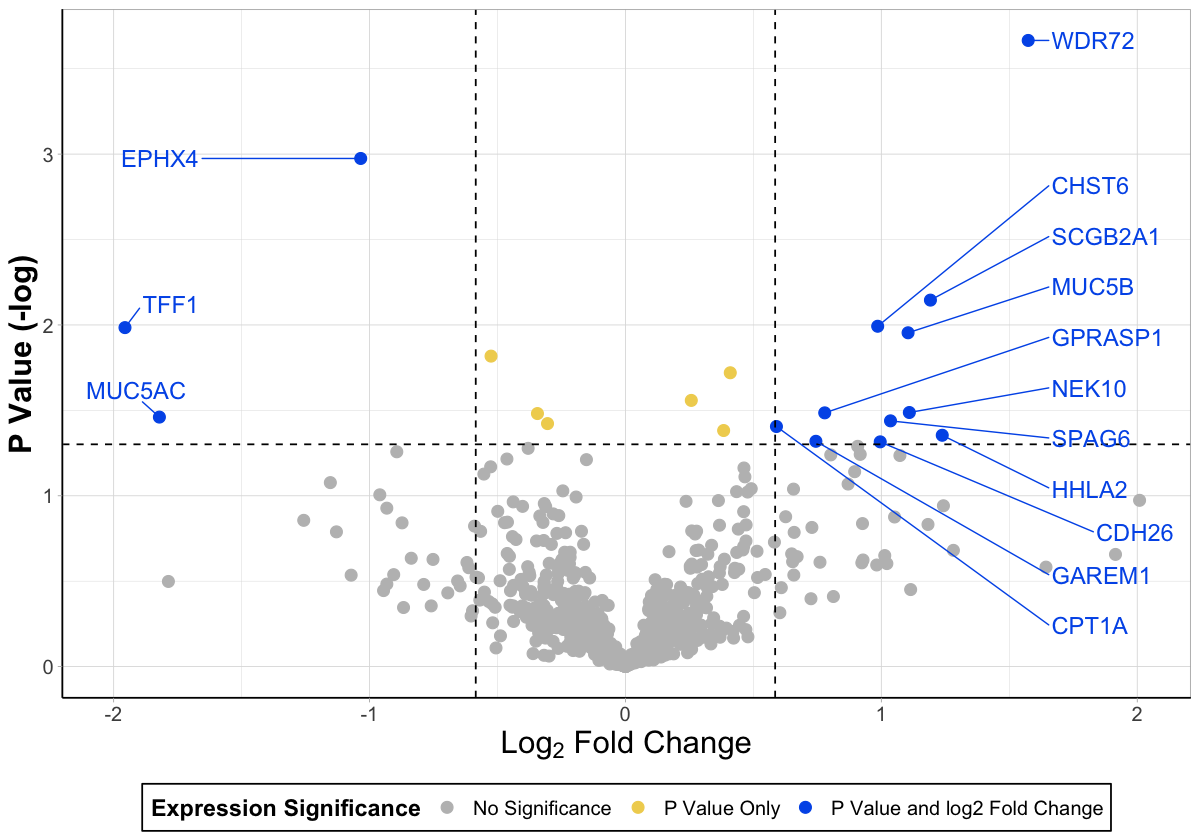

In [12]:
options(repr.plot.width=10, repr.plot.height=7) #changing size

ggplot() + 
  geom_point(data = filtered_df, aes(x = log2FoldChange, y = -log10(pvalue), color = diffexpressed), size = 3) + 

  # P Value line
  geom_hline(yintercept = -log10(0.05), linetype = "dashed") + 
  # FC Line
  geom_vline(xintercept = log2(1.5), linetype = "dashed") +
  geom_vline(xintercept = -log2(1.5), linetype = "dashed") +

 # changing x limits of what is visible in the plot
  xlim(-2, NA) + 

 #labeling points with statistical significance and FC
  geom_text_repel(data = filtered_df %>%
                      filter(log2FoldChange > log2(1.5) & diffexpressed == "P Value and log2 Fold Change"), 
    aes(x = log2FoldChange, y = -log10(pvalue), label = Gene, color = diffexpressed),
    xlim = c(1.6, NA),
    hjust = 0,
    segment.size = 0.4,
     box.padding = 0.7,
     max.overlaps = Inf,
    size = 5, 
    show.legend = FALSE) + 

  geom_text_repel(data = filtered_df %>%
                      filter(log2FoldChange < log2(1.5) & diffexpressed == "P Value and log2 Fold Change"), 
    aes(x = log2FoldChange, y = -log10(pvalue), label = Gene, color = diffexpressed),
    xlim = c(NA, -1.6),
    hjust = 1,
    segment.size = 0.4,
     box.padding = 0.7,
     max.overlaps = Inf,
    size = 5, 
    show.legend = FALSE) + 

  theme_light() + 
  theme(axis.line = element_line(colour = "black"), #making x and y axes black
        axis.text = element_text(size = 12), #changing size of x axis labels
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        legend.title = element_text(face = 'bold', size = 14), #changes legend title
        legend.text = element_text(size = 12), #changes legend text
        legend.position = "bottom", # changing legend position
        legend.background = element_rect(colour = 'black', fill = 'white', linetype = 'solid'),
        strip.text.x = element_text(size = 15, face = "bold"), #changes size of facet x axis 
        strip.text.y = element_text(size = 15, face = "bold")) + #changes size of facet y axis 
  labs(x = expression(Log[2]*" Fold Change"), y = 'P Value (-log)') +

  scale_color_manual(name = "Expression Significance",
                      values = c("gray", '#F0D25E', "#005BEA"))